In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import (pprint as pp, pformat as pf)
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import dmyplant2
dmyplant2.cred()
mp = dmyplant2.MyPlant(3600)

In [2]:
dval = dmyplant2.Validation.load_def_csv("input2.csv")
dval;

In [3]:
i = 2
vale = dval.iloc[i][['serialNumber','Validation Engine','val start']]

In [4]:
#e=dmyplant2.Engine.from_sn(mp,vale['serialNumber'], valstart=vale['val start'])
#e=dmyplant2.Engine.from_sn(mp,1486144) # Forsa Hartmoor M1
#e=dmyplant2.Engine.from_sn(mp,1486152) # Forsa Hartmoor M2
#e=dmyplant2.Engine.from_sn(mp,1486176) # Forsa Hartmoor M3
#e=dmyplant2.Engine.from_sn(mp,1486174) # Forsa Hartmoor M4
#e=dmyplant2.Engine.from_sn(mp,1486197) # Forsa Hartmoor M5
e=dmyplant2.Engine.from_sn(mp,1486198) # Forsa Hartmoor M6
#e=dmyplant2.Engine.from_sn(mp,1486236) # Forsa Hartmoor M7
#e=dmyplant2.Engine.from_sn(mp,1486225) # Forsa Hartmoor M8
#e=dmyplant2.Engine.from_sn(mp,1486251) # Forsa Hartmoor M9
#e=dmyplant2.Engine.from_sn(mp,1486255) # Forsa Hartmoor M10
#e=dmyplant2.Engine.from_sn(mp,1486272) # Forsa Hartmoor M11


In [5]:
# Ammerlaan Flowers 2, J420 Frage von David Sepulveda Lopez
#e=dmyplant2.Engine.from_sn(mp,5640011)

In [6]:
pd.DataFrame.from_dict(e.dash, orient='index').T

,Name,Engine ID,Design Number,Engine Type,Engine Version,P,P_nom,BMEP,serialNumber,id,Count_OpHour,val start,oph@start,oph parts,LOC
0,Forsa Hartmoor,M06,AL89,624,H12,24,4582.1,24.5,1486198,159401,162.0,2022-01-10,0,162,0.1695


In [7]:
from dfsm import msgFSM
#fsm = msgFSM(e, skip_day=7)
#fsm = msgFSM(e, p_from='2022-01-11')
fsm = msgFSM(e)
fsm.run() # run Finite State Machine

Using '9047 target load reached' Message.


FSM: 100%|███████████████████████| 10513/10513 [00:01<00:00, 9536.78 messages/s]


In [8]:
fsm._data

,time,Power_PowerAct,Various_Values_SpeedAct,datetime
0,1635955800000,0.000000,0.0,2021-11-03 16:10:00
1,1635955830000,0.000000,0.0,2021-11-03 16:10:30
2,1635955860000,0.000000,0.0,2021-11-03 16:11:00
3,1635955890000,0.000000,0.0,2021-11-03 16:11:30
4,1635955920000,0.000000,0.0,2021-11-03 16:12:00
...,...,...,...,...
314382,1645387080000,4496.720533,1499.0,2022-02-20 19:58:00
314383,1645387110000,4487.631300,1499.0,2022-02-20 19:58:30
314384,1645387140000,4471.907467,1499.0,2022-02-20 19:59:00
314385,1645387170000,4479.139400,1499.0,2022-02-20 19:59:30


In [9]:
fsm._data[(fsm._data['time'] >= 1637173443403-2*30000) & (fsm._data['time'] <= 1637173443403+2*30000)]

,time,Power_PowerAct,Various_Values_SpeedAct,datetime
40587,1637173410000,0.0,0.0,2021-11-17 18:23:30
40588,1637173440000,0.0,0.0,2021-11-17 18:24:00
40589,1637173470000,0.0,0.0,2021-11-17 18:24:30
40590,1637173500000,0.0,0.0,2021-11-17 18:25:00


In [12]:
ddf = fsm._data
tts=1637687335601
print(tts, pd.to_datetime(int(tts)*1e6).strftime('%d.%m.%Y %H:%M:%S'))
ldlta=10
rdlta=5
step = 30000
idf = ddf[(ddf['time'] >= tts-ldlta*step) & (ddf['time'] <= tts+rdlta*step)]
idf

1637687335601 23.11.2021 17:08:55


,time,Power_PowerAct,Various_Values_SpeedAct,datetime
57709,1637687040000,0.000000,0.000000,2021-11-23 17:04:00
57710,1637687070000,0.000000,0.000000,2021-11-23 17:04:30
57711,1637687100000,0.000000,0.074200,2021-11-23 17:05:00
57712,1637687130000,0.000000,538.035987,2021-11-23 17:05:30
57713,1637687160000,0.000000,1498.132144,2021-11-23 17:06:00
57714,1637687190000,163.777133,1503.509286,2021-11-23 17:06:30
57715,1637687220000,1211.061927,1500.000000,2021-11-23 17:07:00
57716,1637687250000,2158.132008,1500.791567,2021-11-23 17:07:30
57717,1637687280000,3133.480624,1500.737903,2021-11-23 17:08:00
57718,1637687310000,4101.106053,1502.000000,2021-11-23 17:08:30


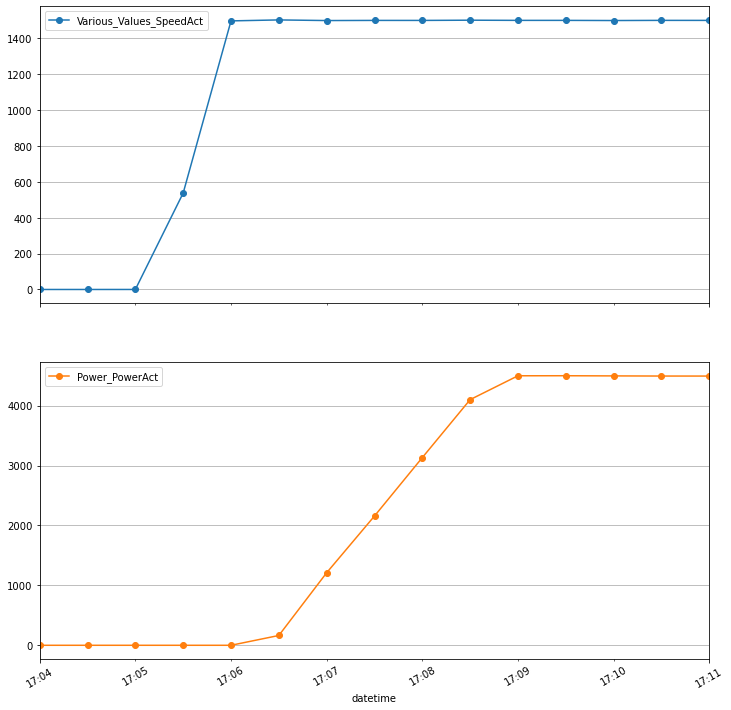

In [13]:
idf[['datetime','Power_PowerAct','Various_Values_SpeedAct']].plot(
    x='datetime',
    y=['Various_Values_SpeedAct','Power_PowerAct'],
    subplots=True,
    figsize=(12,12), kind='line', marker="o", grid=True, rot=30);

In [ ]:
rdf = pd.DataFrame(fsm._starts)
rdf

In [ ]:
print("""
****************
** Überblick: **
****************
""")
print(f"{'Motor':9}: {e} {e['Count_OpHour']} Bh")
print(f"{'Meldung':9}- '{'9047 target load reached'}' {'gefunden.' if any(fsm._messages['name'] == '9047') else 'wird berechnet.'}")
print(f"{'Zeitraum':9}: {fsm.first_message:%d.%m.%Y} bis {fsm.last_message:%d.%m.%Y}")
print(f"{'Dauer':9}: {fsm.period.days} Tage ~ {fsm.period.days / 365:2.1f} Jahre")
print()
print(f"{'GESAMT':9}: {rdf.shape[0]:5} Starts, {rdf[rdf.success].shape[0]:5} erfolgreich => {(rdf[rdf.success].shape[0] / rdf.shape[0]) * 100.0:3.1f} % der Starts erfolgreich.")
for mode in ['OFF', 'MANUAL', 'AUTO']:
    print(f"{mode:9}: {rdf[(rdf['mode'] == mode)].shape[0]:5} Starts, {rdf[((rdf.success) & (rdf['mode'] == mode))].shape[0]:5} erfolgreich => {(rdf[((rdf.success) & (rdf['mode'] == mode))].shape[0] / rdf[(rdf['mode'] == mode)].shape[0]) * 100.0:3.1f} % der Starts erfolgreich.")

In [ ]:
rda = rdf
#rda = rdf[((rdf['mode'] == 'AUTO') & (rdf['success'] == True))]
#rda = rdf[((rdf['mode'] == 'AUTO') & (rdf['success'] == True) & (rdf['synchronize'] < 300.0) & (rdf['start-preparation'] < 300.0))]
#rda = rdf[((rdf['success'] == True) & (rdf['start-preparation'] < 1000.0))]
rda = rdf[((rdf['success'] == True))]
rda = rda[['success','mode','cumstarttime','start-preparation','starter','hochlauf','idle','synchronize','load-ramp','target-operation']]
rda.round(2);

In [ ]:
rda.describe().round(2).T

In [ ]:
longer_than_300s = rda[rdf['cumstarttime'] > 300.0]
longer_than_300s.round(2);

In [ ]:
longer_than_300s.describe().round(2).T

In [ ]:
load_ramp_less_than_100s = rda[rdf['load-ramp'] < 100.0]
load_ramp_less_than_100s.round(2);

In [ ]:
load_ramp_less_than_100s.describe().round(2).T

In [ ]:
rda[['start-preparation','starter','hochlauf','idle','synchronize','cumstarttime','load-ramp','target-operation']].hist(figsize = (20,12), bins=50, layout=(3,3));
#rda.hist(figsize = (20,12), bins=100, layout=(4,2));

In [ ]:
#rda.plot.box(subplots=True, grid = True, figsize=(24,10), layout=(1,7));
#rda.plot.box(subplots=True, grid = True, figsize=(24,10), layout=(1,7), sym='');

In [ ]:
nalarms = []
ct = 0
for i,c in rdf.iterrows():
    if len(c['alarms']) > 0 and not c['success']:
        ct += 1
        print(f"\nStartversuch: {i}, Success: {c['success']}")
        for a in c['alarms']:
            nalarms.append(a['msg'])
            print(f"{c['mode']:15} {a['state']:20} {a['msg']['timestamp']} {pd.to_datetime(int(a['msg']['timestamp'])*1e6).strftime('%d.%m.%Y %H:%M:%S')} {a['msg']['name']} {a['msg']['message']}")
print(f"""
***********************************
** {ct:3} nicht erfolgreiche Starts **
***********************************
""")

In [ ]:
al = pd.DataFrame(fsm._pareto(nalarms))
fig = plt.figure();
color = 'purple'

if not al.empty:
    al['msg'] = al['msg'] + ' (' + al['name'] + ')'
    al.set_index('msg').sort_values(by = "anz",ascending=True).plot.barh(y=['anz'],figsize=(16,len(al) / 3.8), color=[color], position = 1.0, grid=True, title='Alarms in not successful Starts');
    plt.plot();

In [ ]:
phases = [['start-preparation','starter','hochlauf','idle','synchronize','load-ramp','target-operation'],'start-preparation','starter','hochlauf','idle','synchronize','load-ramp','target-operation']
fig = plt.figure();
color = 'red'

for phase in phases:
    al = fsm.alarms_pareto(phase)[:30]
    if not al.empty:
        al['msg'] = al['msg'] + ' (' + al['name'] + ')'
        al.set_index('msg').sort_values(by = "anz",ascending=True).plot.barh(y=['anz'],figsize=(16,len(al) / 3.8), color=[color], position = 1.0, grid=True, title=' | '.join(phase) if type(phase) == list else phase);
        plt.plot();


In [ ]:
phases = [['start-preparation','starter','hochlauf','idle','synchronize','load-ramp','target-operation'],'start-preparation','starter','hochlauf','idle','synchronize','load-ramp','target-operation']
fig = plt.figure();
color = 'orange'

for phase in phases:
    al = fsm.warnings_pareto(phase)[:30]
    if not al.empty:
        al['msg'] = al['msg'] + ' (' + al['name'] + ')'
        al.set_index('msg').sort_values(by = "anz",ascending=True).plot.barh(y=['anz'],figsize=(16,len(al) / 3.8), color=[color], position = 1.0, grid=True, title=' | '.join(phase) if type(phase) == list else phase);
        plt.plot();


In [ ]:
mfn = './data/' + str(e._sn) + '_messages.txt'
fsm.save_messages('./data/' + str(e._sn) + '_messages.txt')
print(mfn)

In [ ]:
any(fsm._messages['name'] == '9047')

In [ ]:
#fsm.store()